In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from baseimage import PETImage, normalize
from scipy.integrate import odeint
from kmeans_segmentation import kmeans_sihl, pca_kmeans_segmentation, fourier_kmeans_segmentation, apply_masks
from utility_functions import sparsifyDynamics, poolData
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import style
style.use('dark_background')

Some helpful functions

In [16]:
def disp_segment(seg, view_ax = 'y', col_t = 'sum', col_v = 'sum', figsize=(18, 16)):
    ax_ix = {'z':0,'y':1,'x':2,'t':3}[view_ax]
    
    frame = getattr(seg,col_t)(axis=3)
    
    img = getattr(frame,col_v)(axis=ax_ix)
    
    fig = plt.figure(figsize=figsize)
    plt.imshow(img,cmap='gray')
    plt.show()
    

    
# def find_opt_x0(dynamic_fn, xdf):

In [17]:
#data_dir = 'data'
#pet_files = [f for f in os.listdir(data_dir) if f.endswith('.pet.img') and not f.startswith('.')]
#fname = pet_files[0]
#fpath = os.path.join(data_dir,fname)

fpath = os.path.join("Downloads",
                        "Pre-Clinical_Data_Samples",
						"Seimens Inveon Scanner",
						"4 Bed",
						"Dynamic",
						"PET",
						"mpet3721a_em1_v1.pet.img")

my_img = PETImage(filepath=fpath)
my_img.load_image()

File dimensions: (128,128,159,40)
Reading image data...


Clustering image voxels...
distortion:
0.006030652137273889
Created 2 masks of image


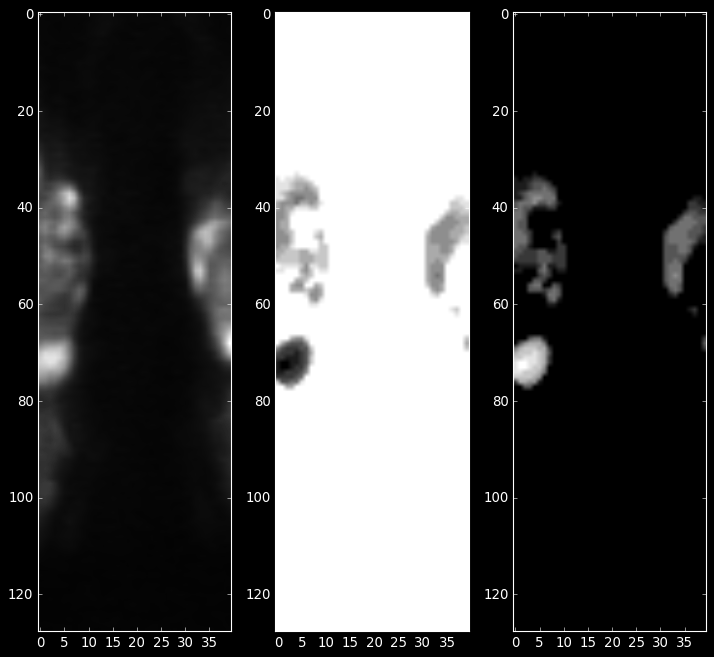

distortion:
0.004000907124654506
Created 3 masks of image


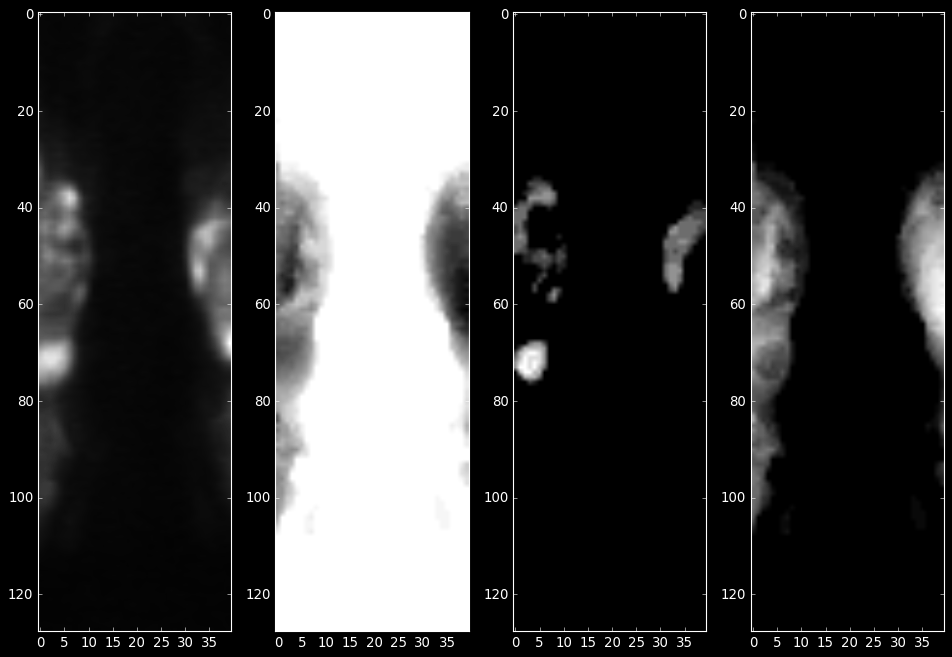

distortion:
0.0038381634104764717
Created 4 masks of image


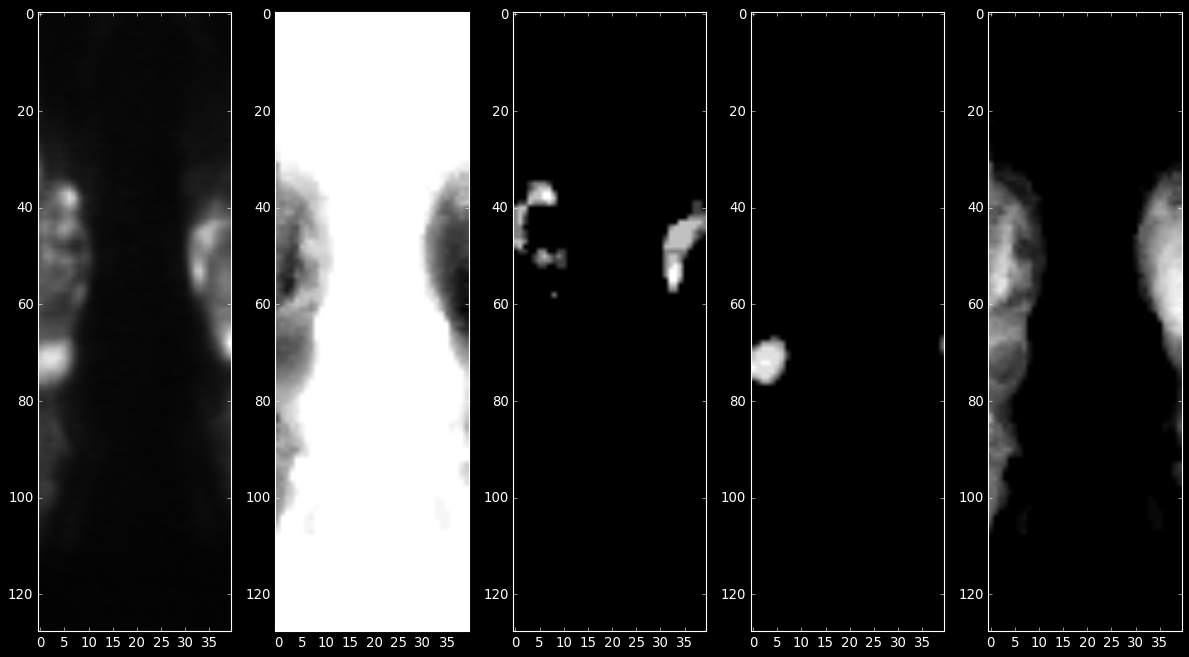

distortion:
0.003647974075247052
Created 5 masks of image


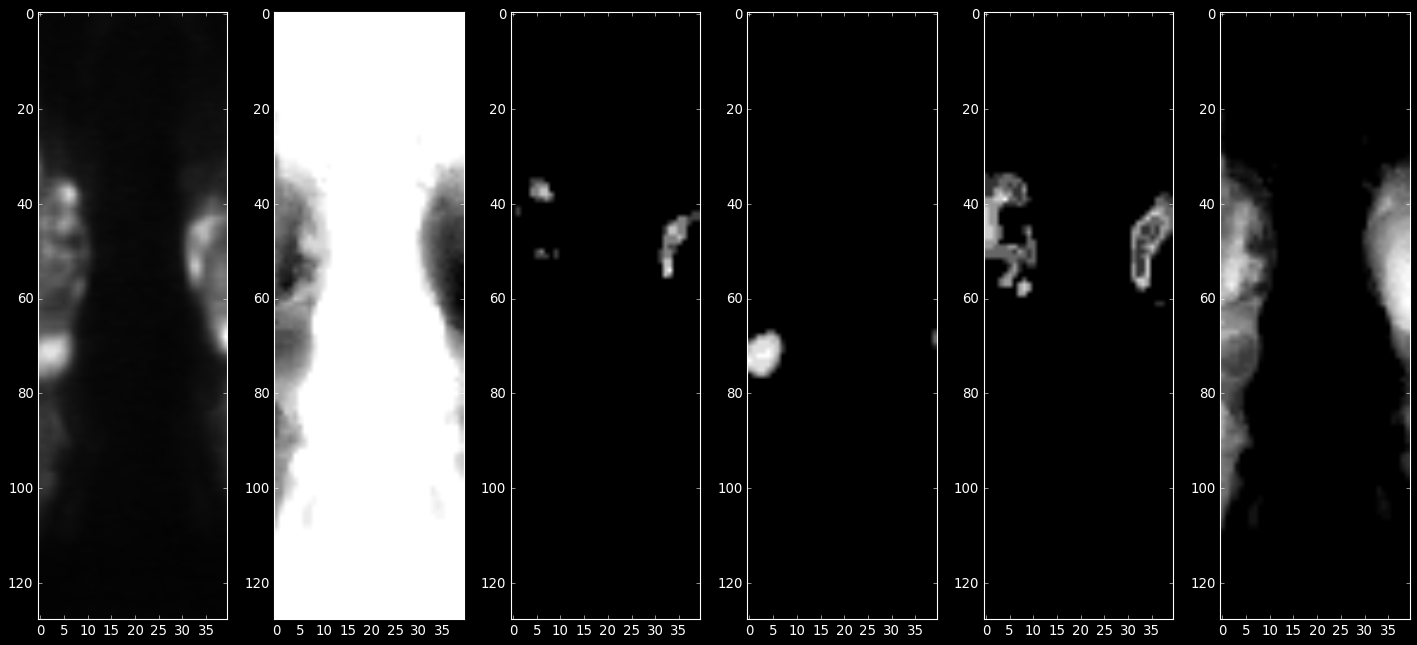

distortion:
0.003601183150524325
Created 6 masks of image


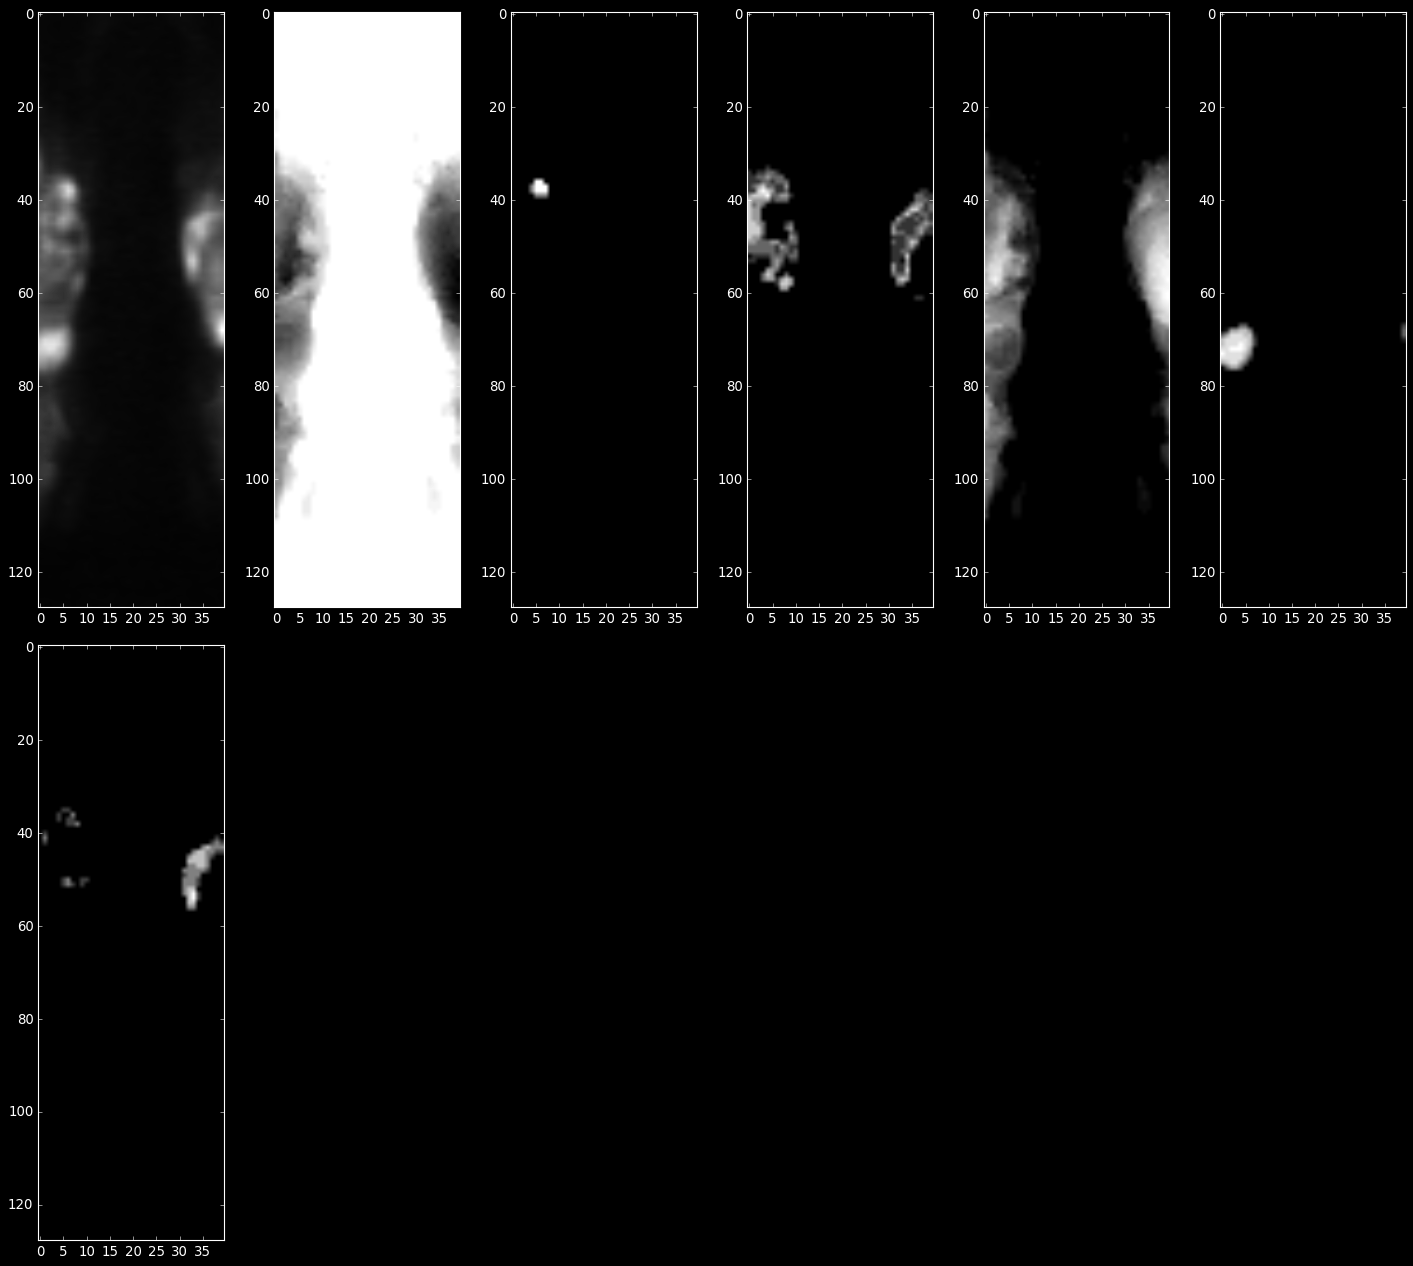

distortion:
0.0030437175885415064
Created 7 masks of image


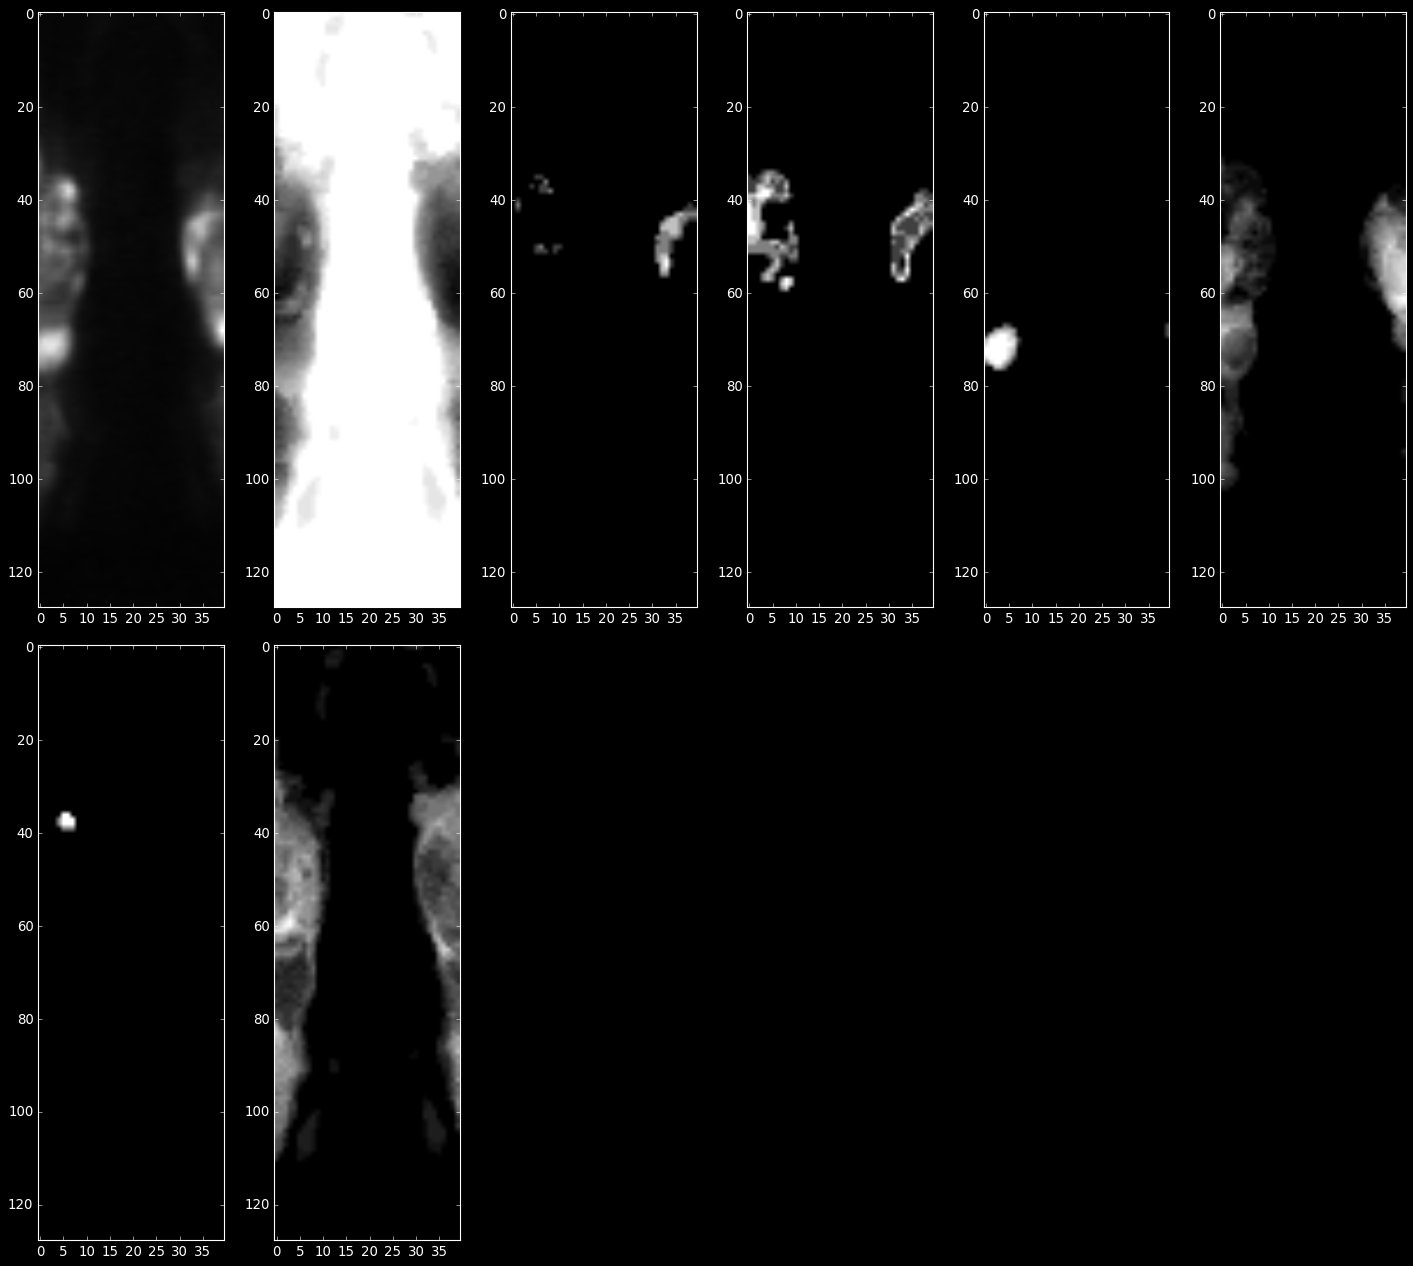

distortion:
0.0030090620479013286
Created 8 masks of image


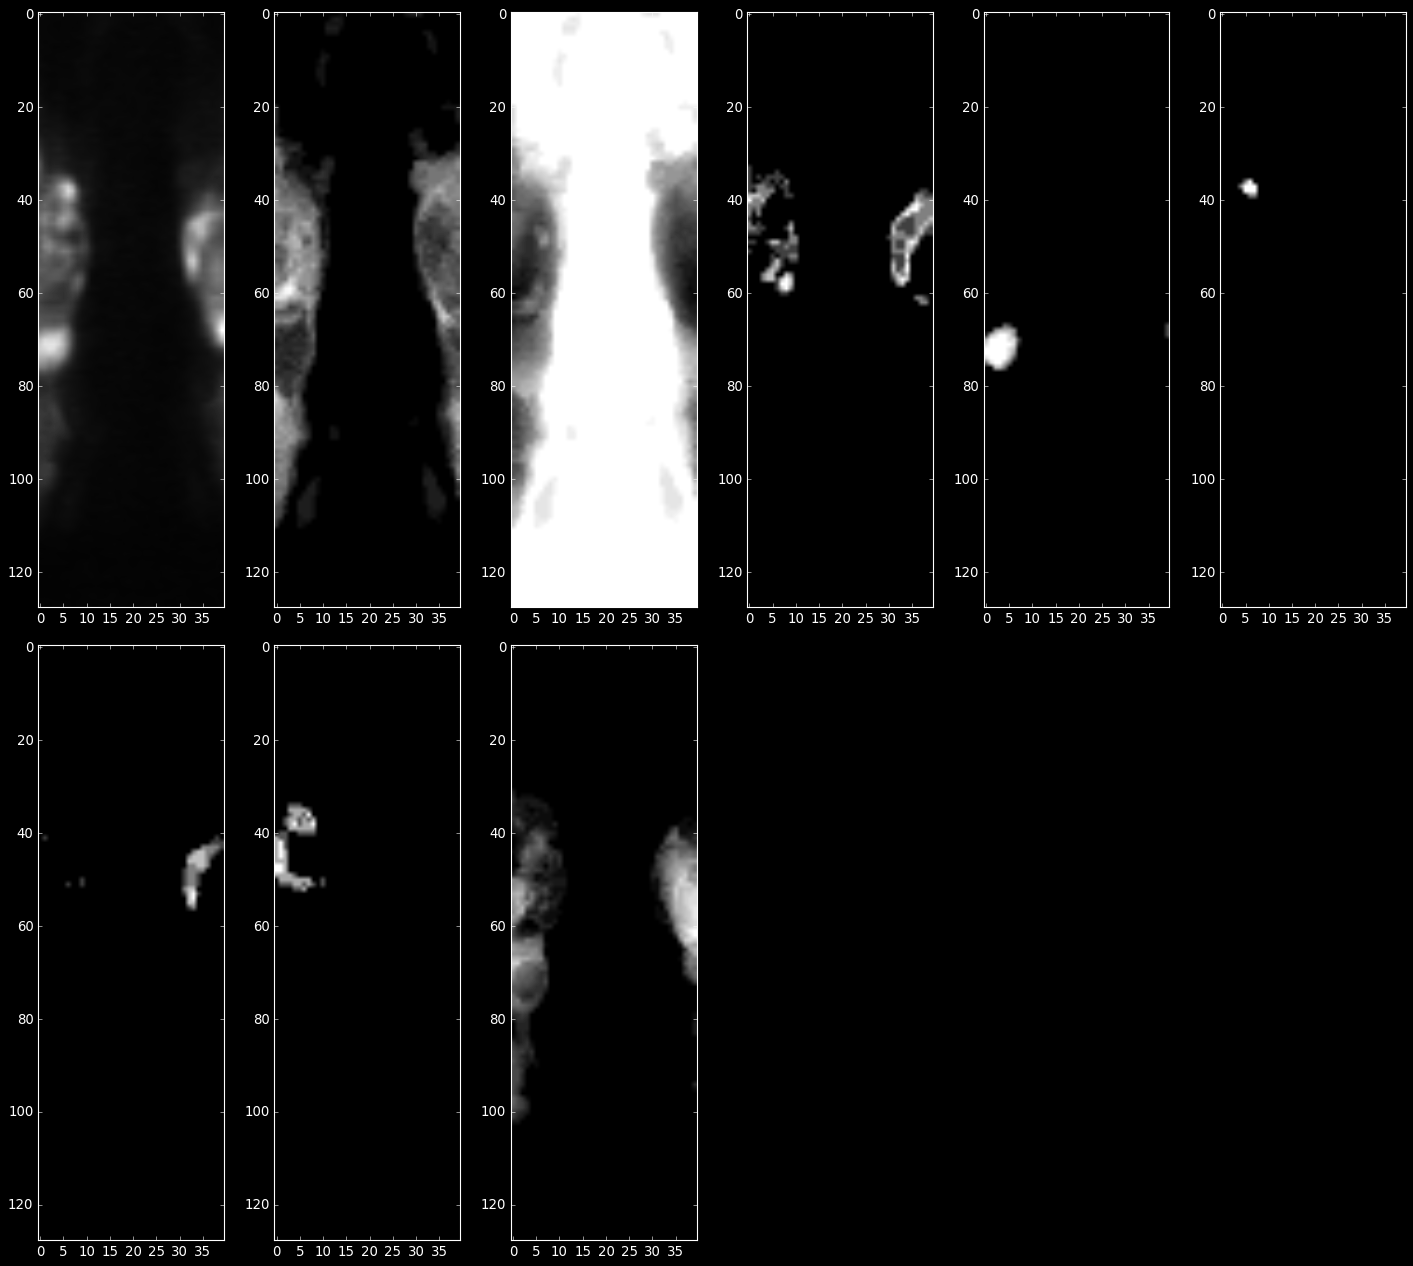

distortion:
0.0029157432089044148
Created 9 masks of image


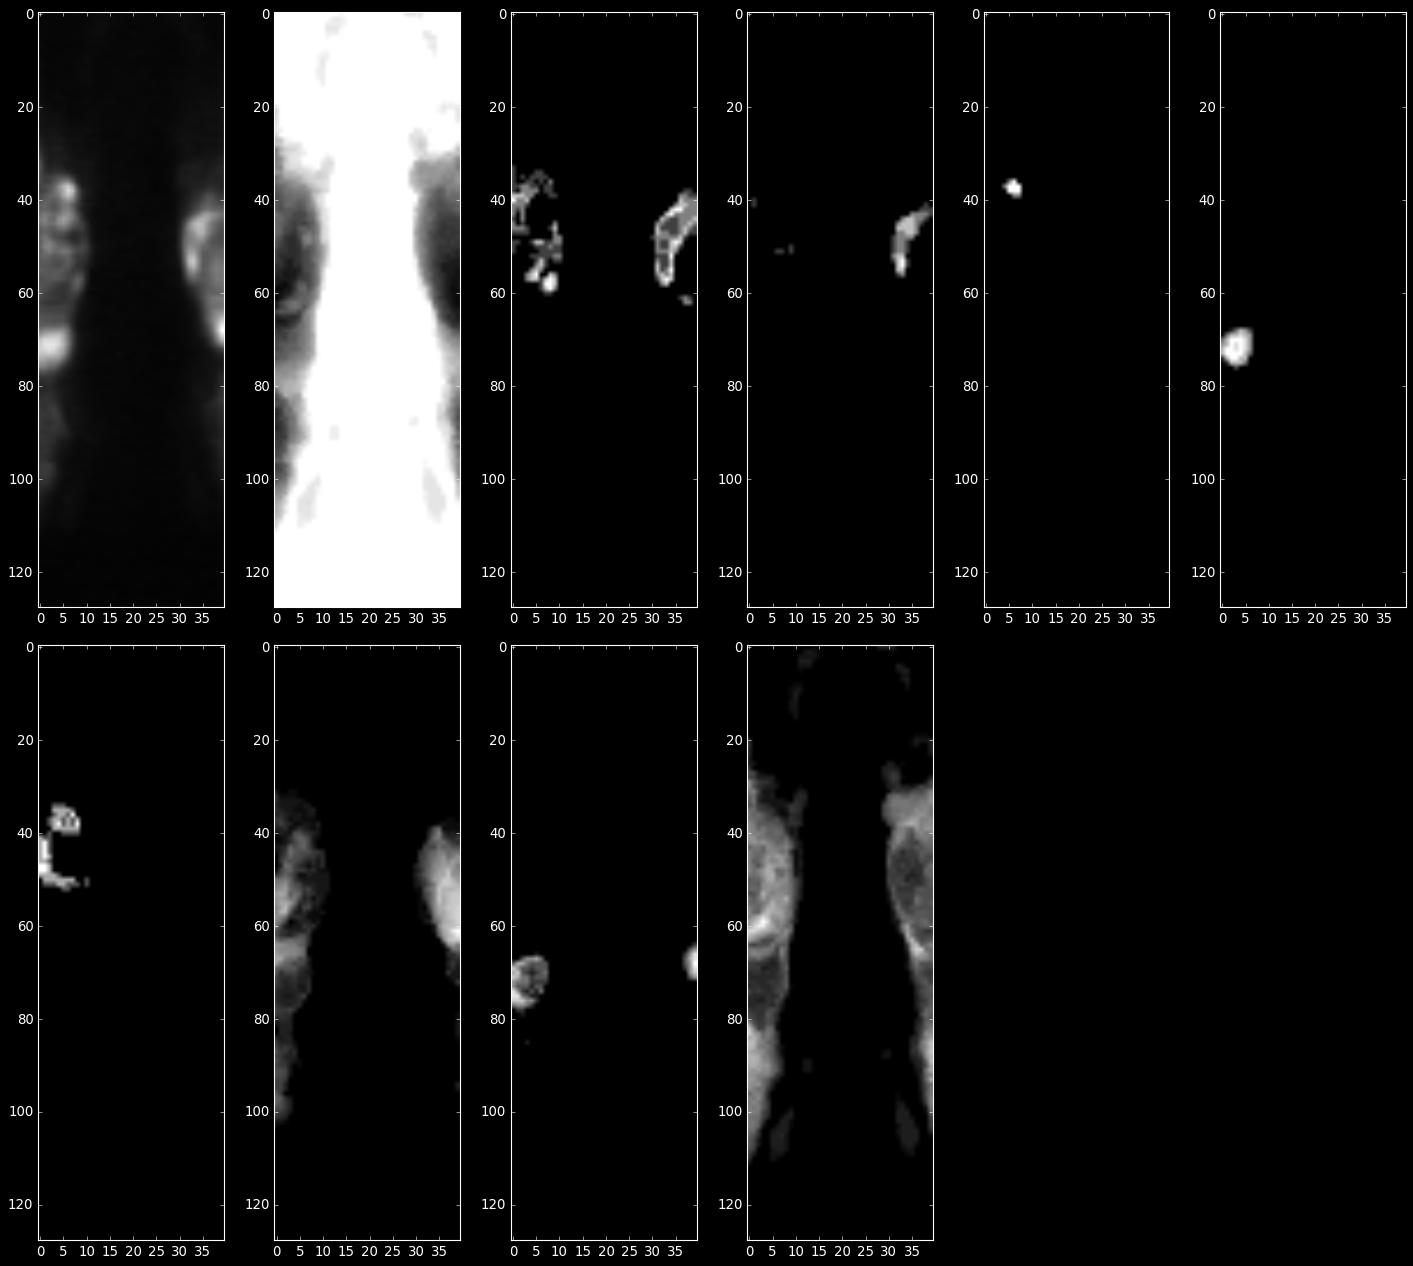

distortion:
0.0028567507802508933
Created 10 masks of image


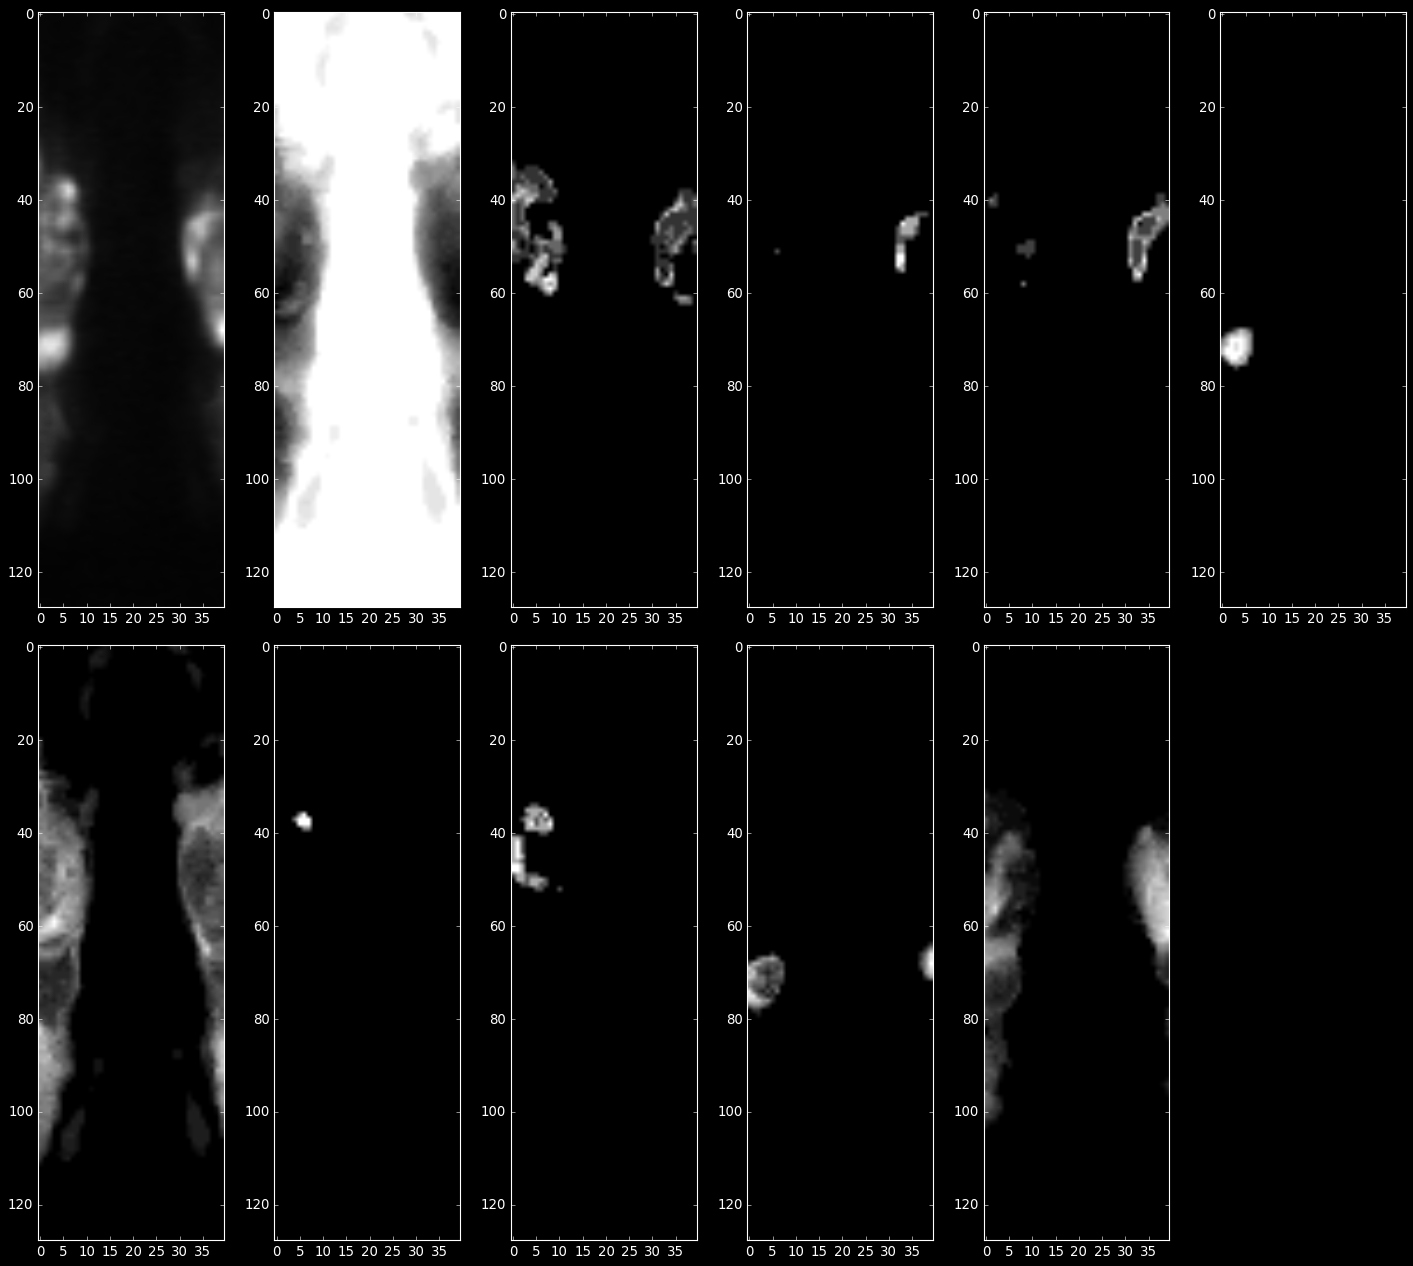

distortion:
0.002794630569543739
Created 11 masks of image


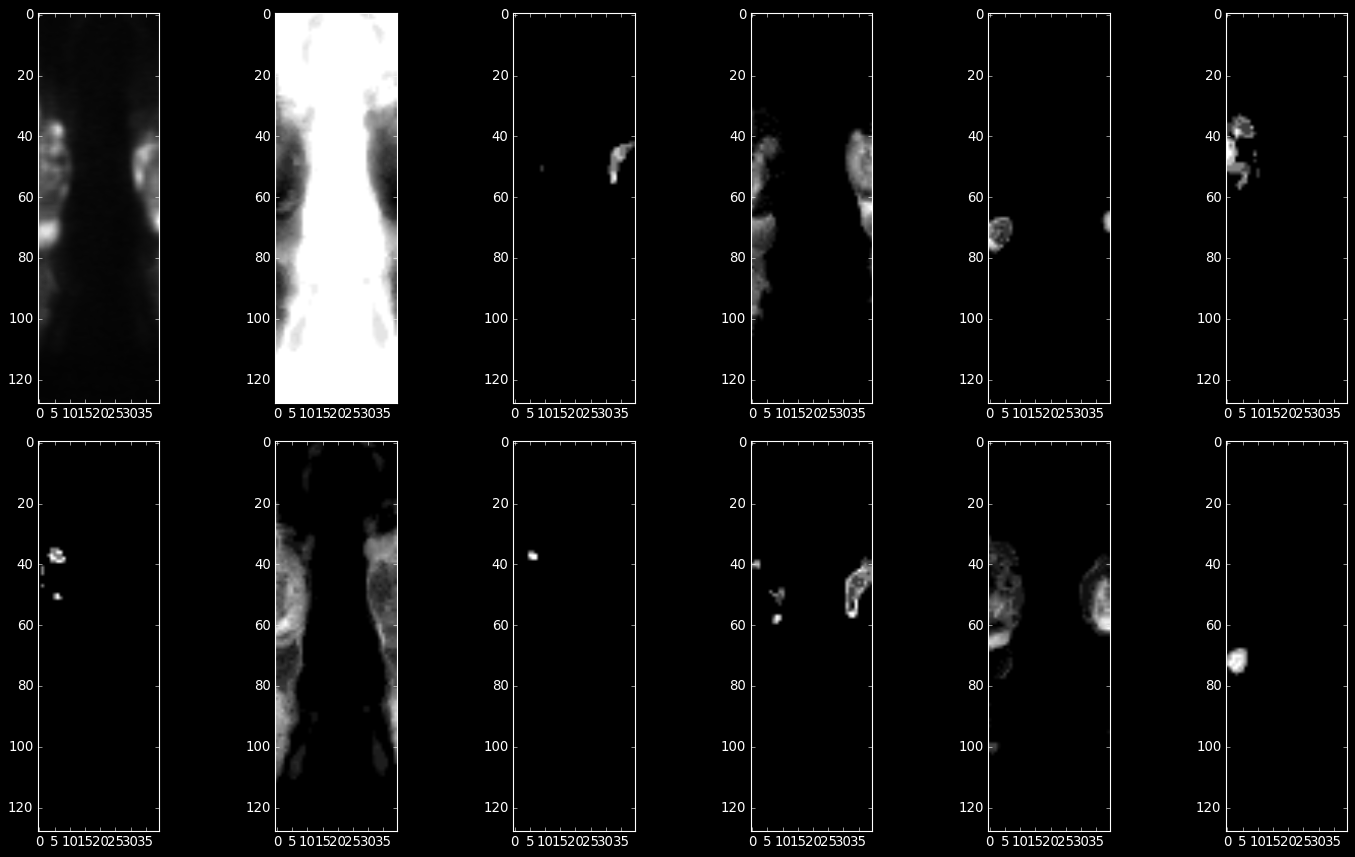

distortion:
0.0024980991343156347
Created 12 masks of image


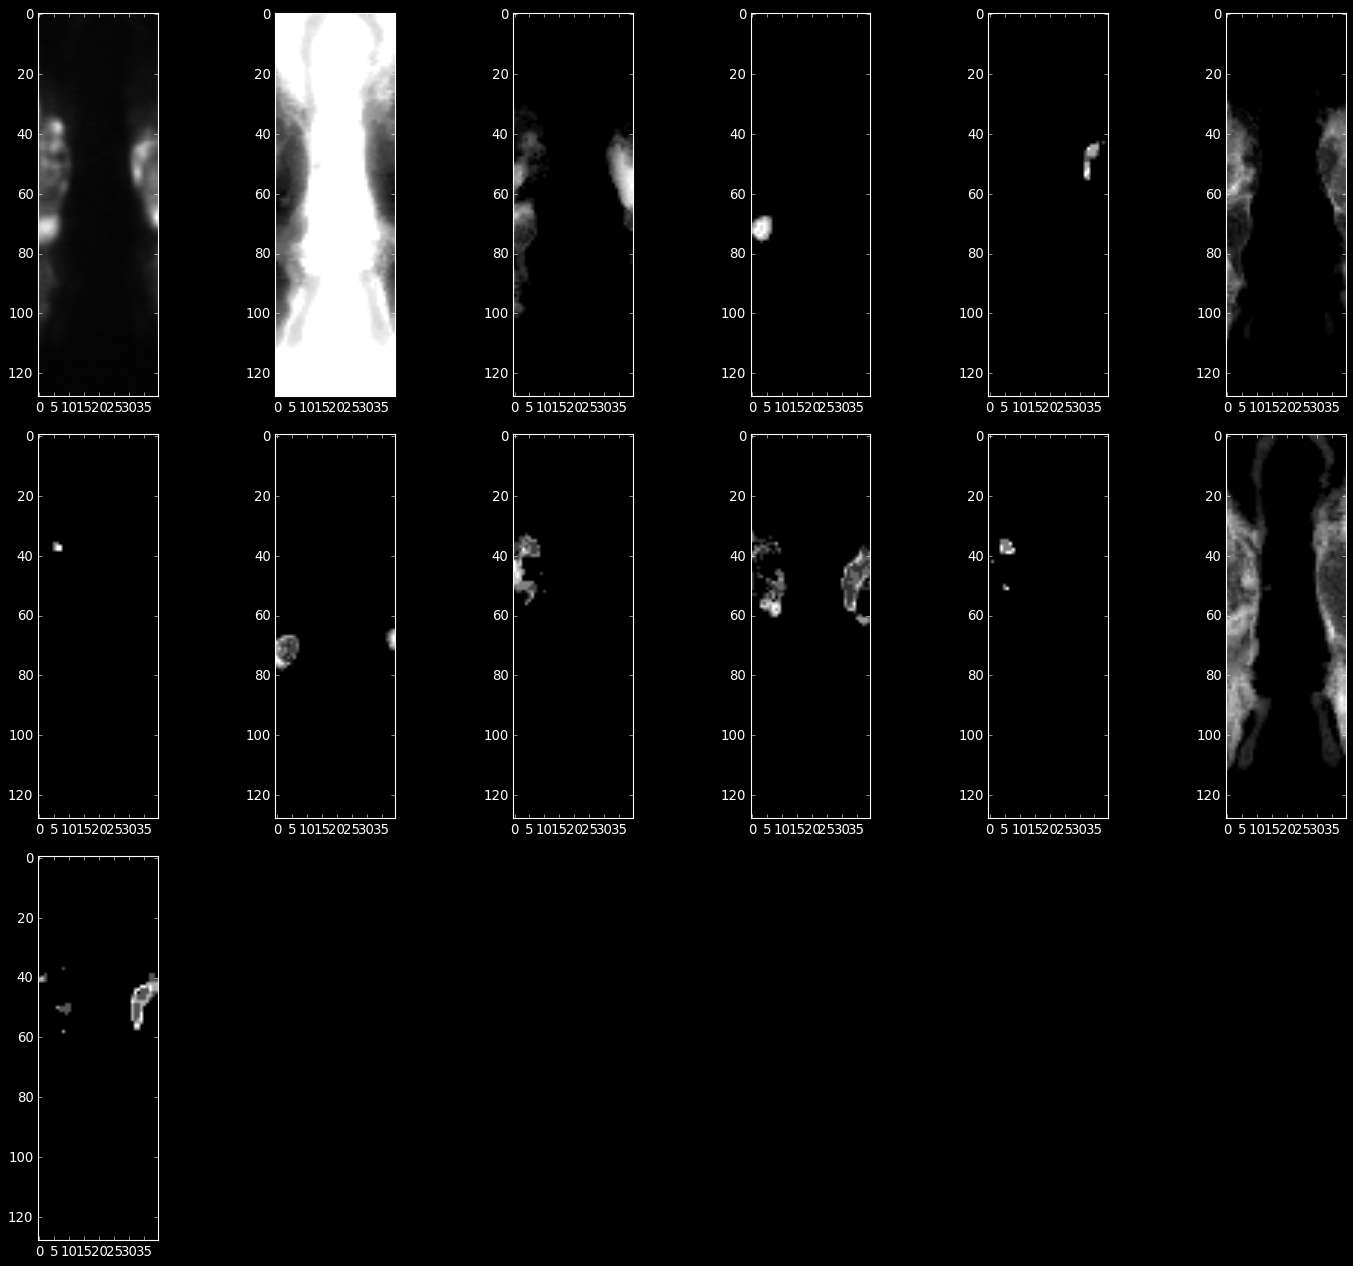

distortion:
0.0024268377523444895
Created 13 masks of image


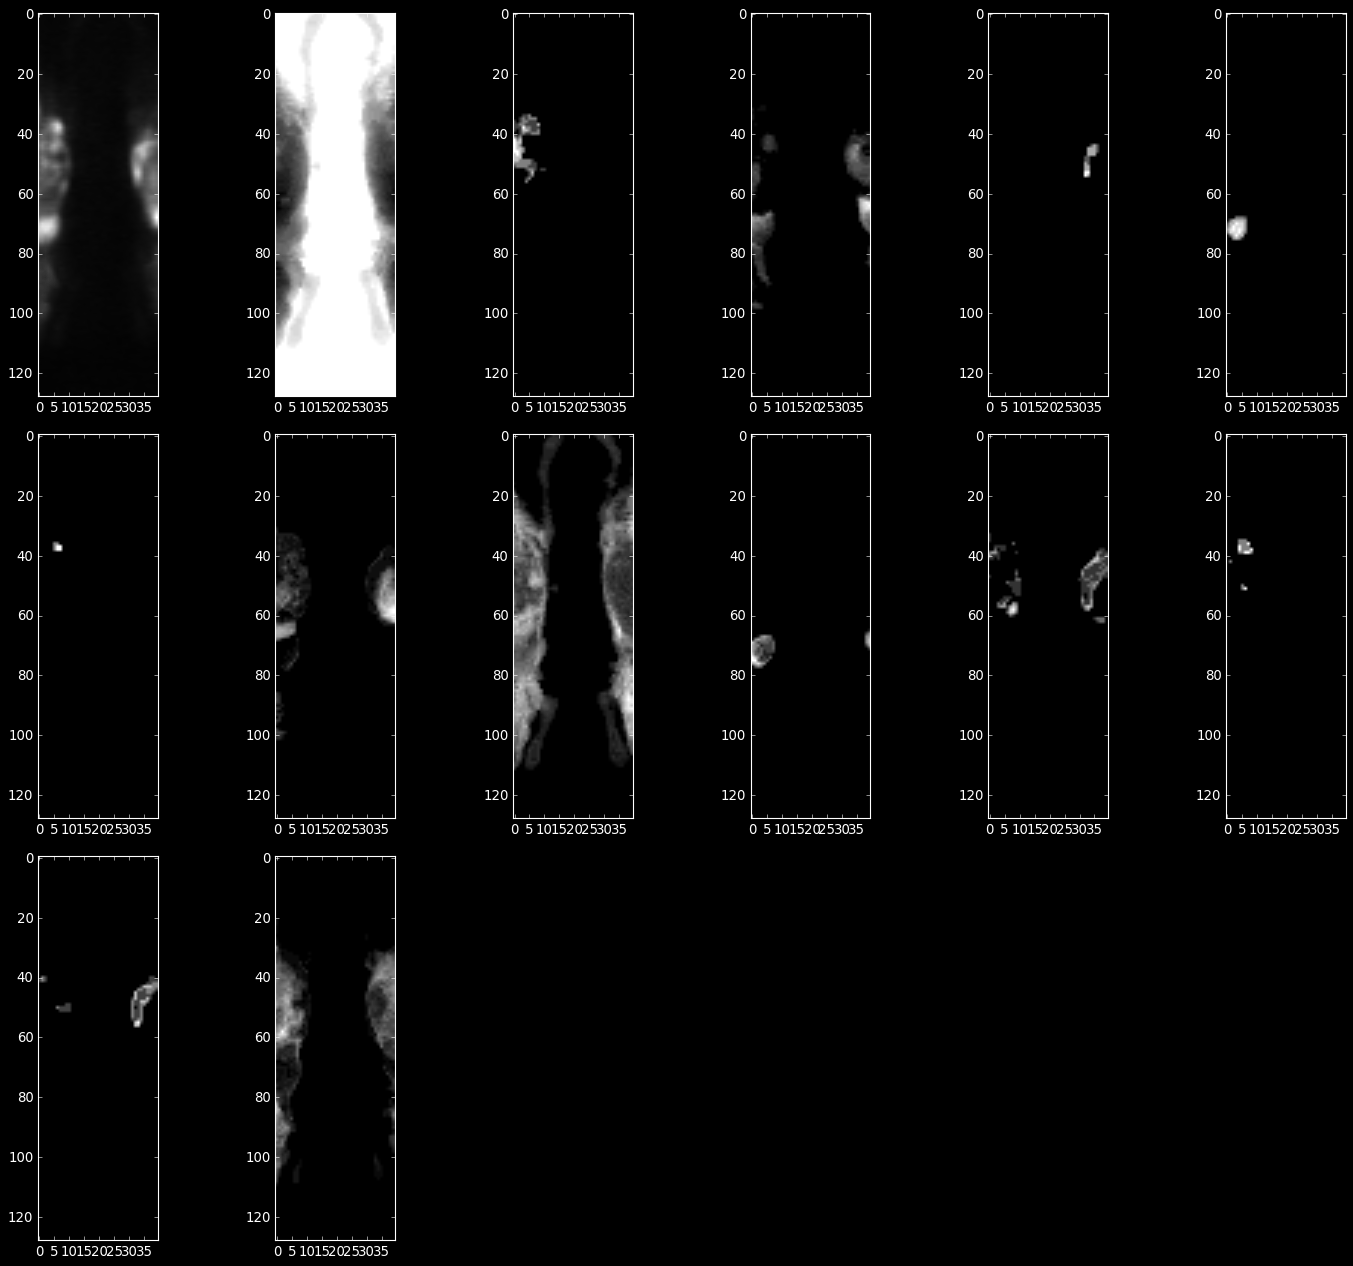

distortion:
0.0023996841527520697
Created 14 masks of image


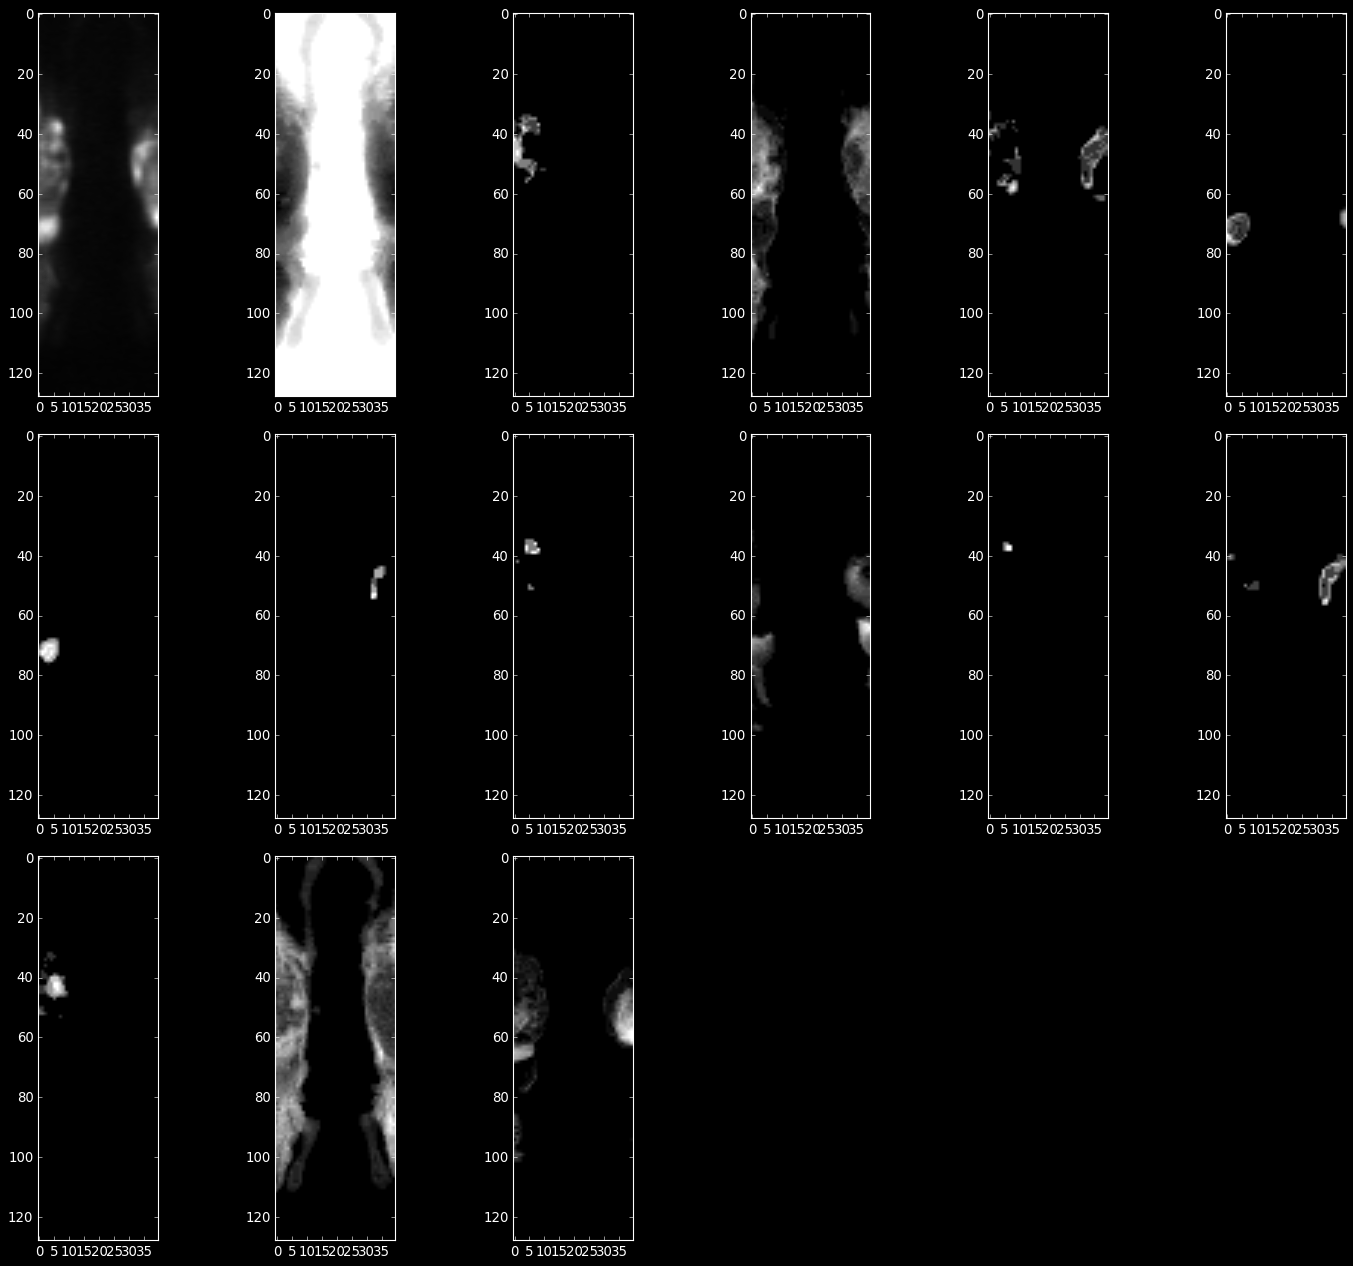

distortion:
0.002315584460888739
Created 15 masks of image


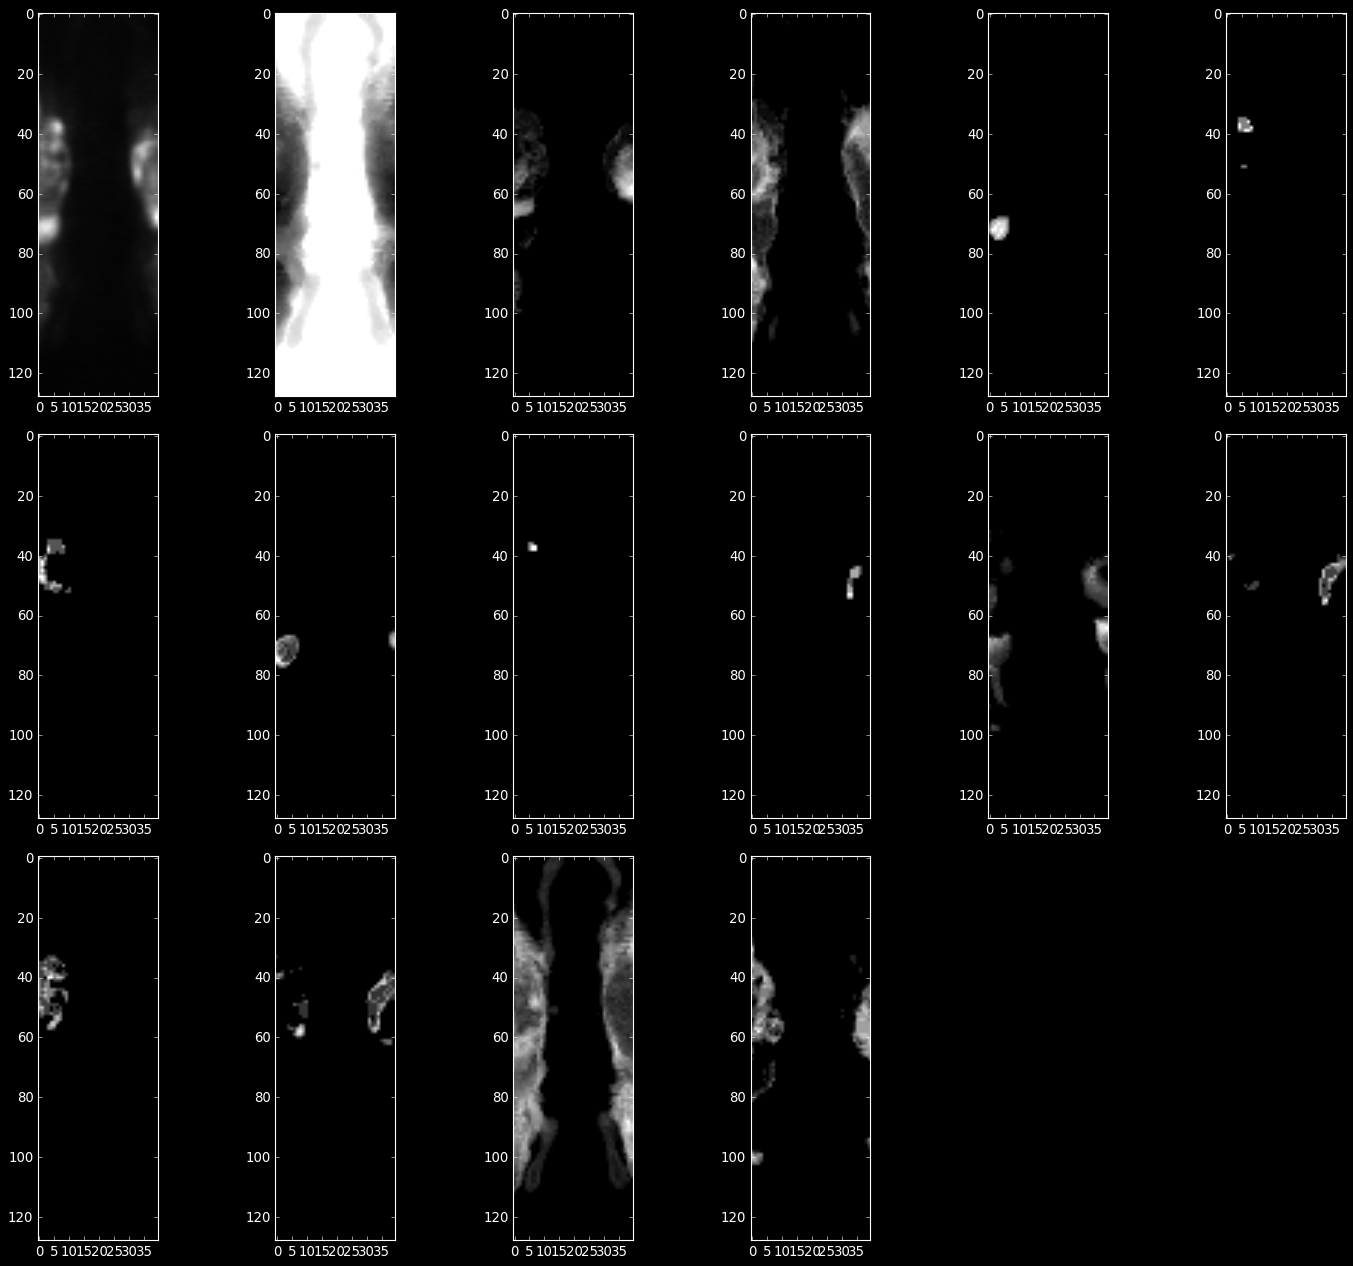

distortion:
0.002231780305457371
Created 16 masks of image


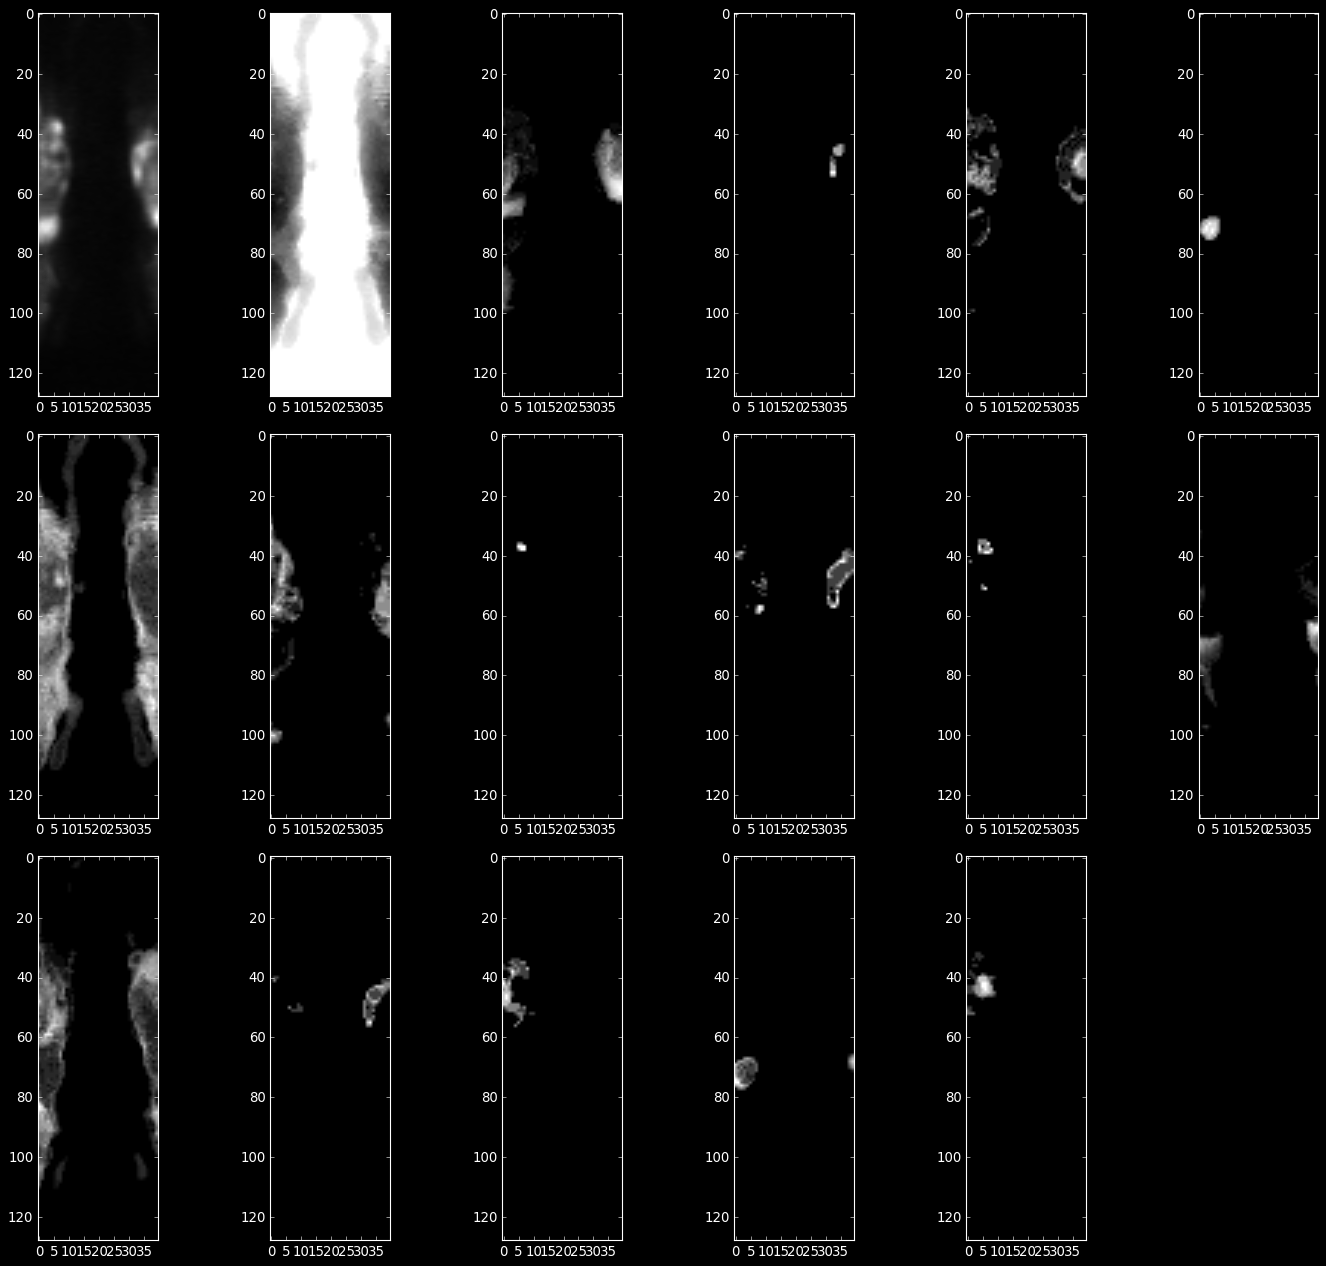

distortion:
0.002213157893692046
Created 17 masks of image


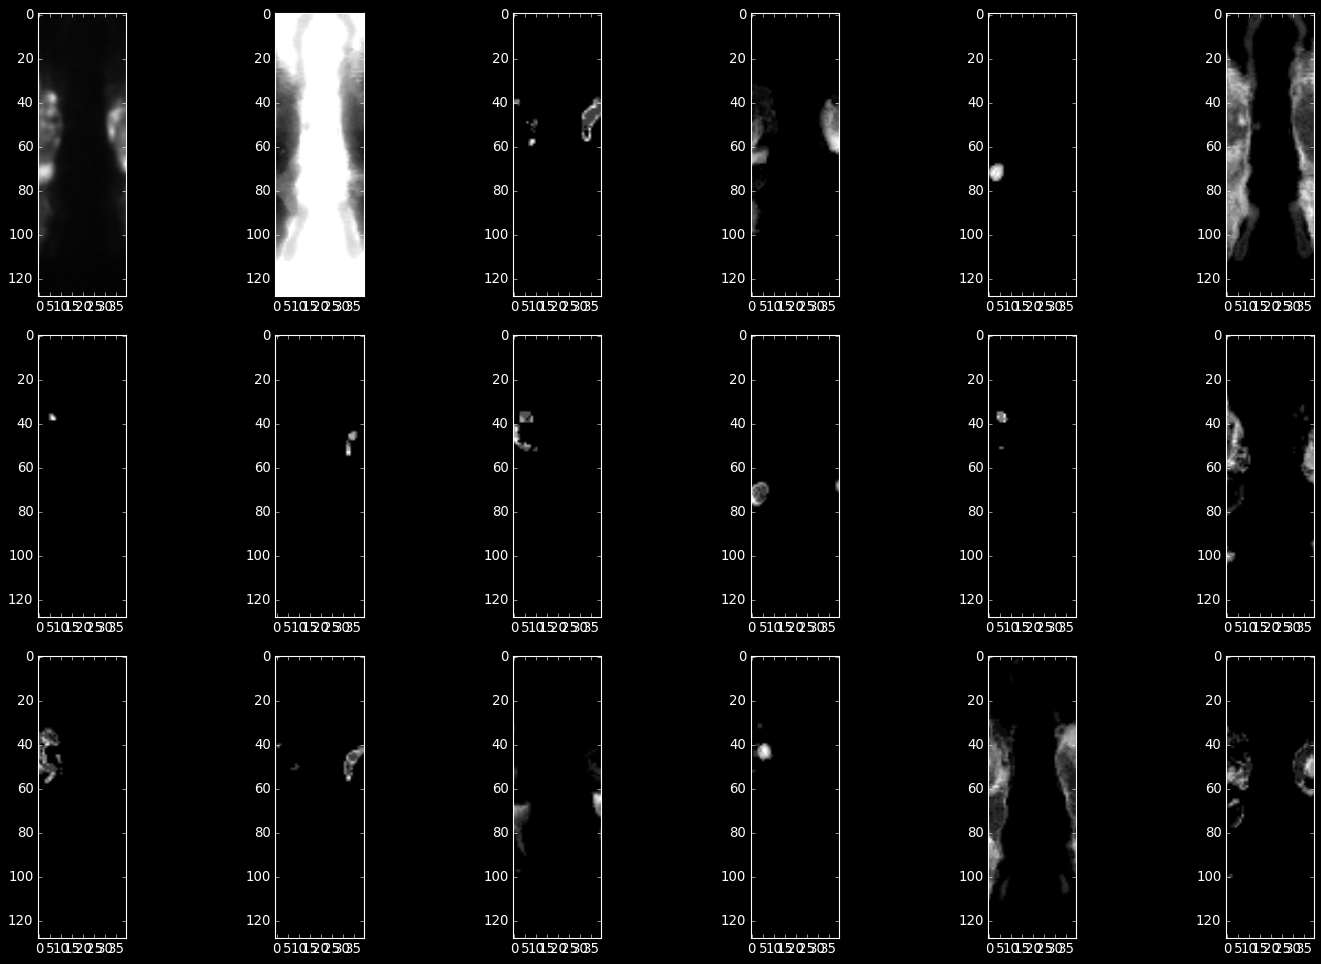

distortion:
0.0021058363214222528
Created 18 masks of image


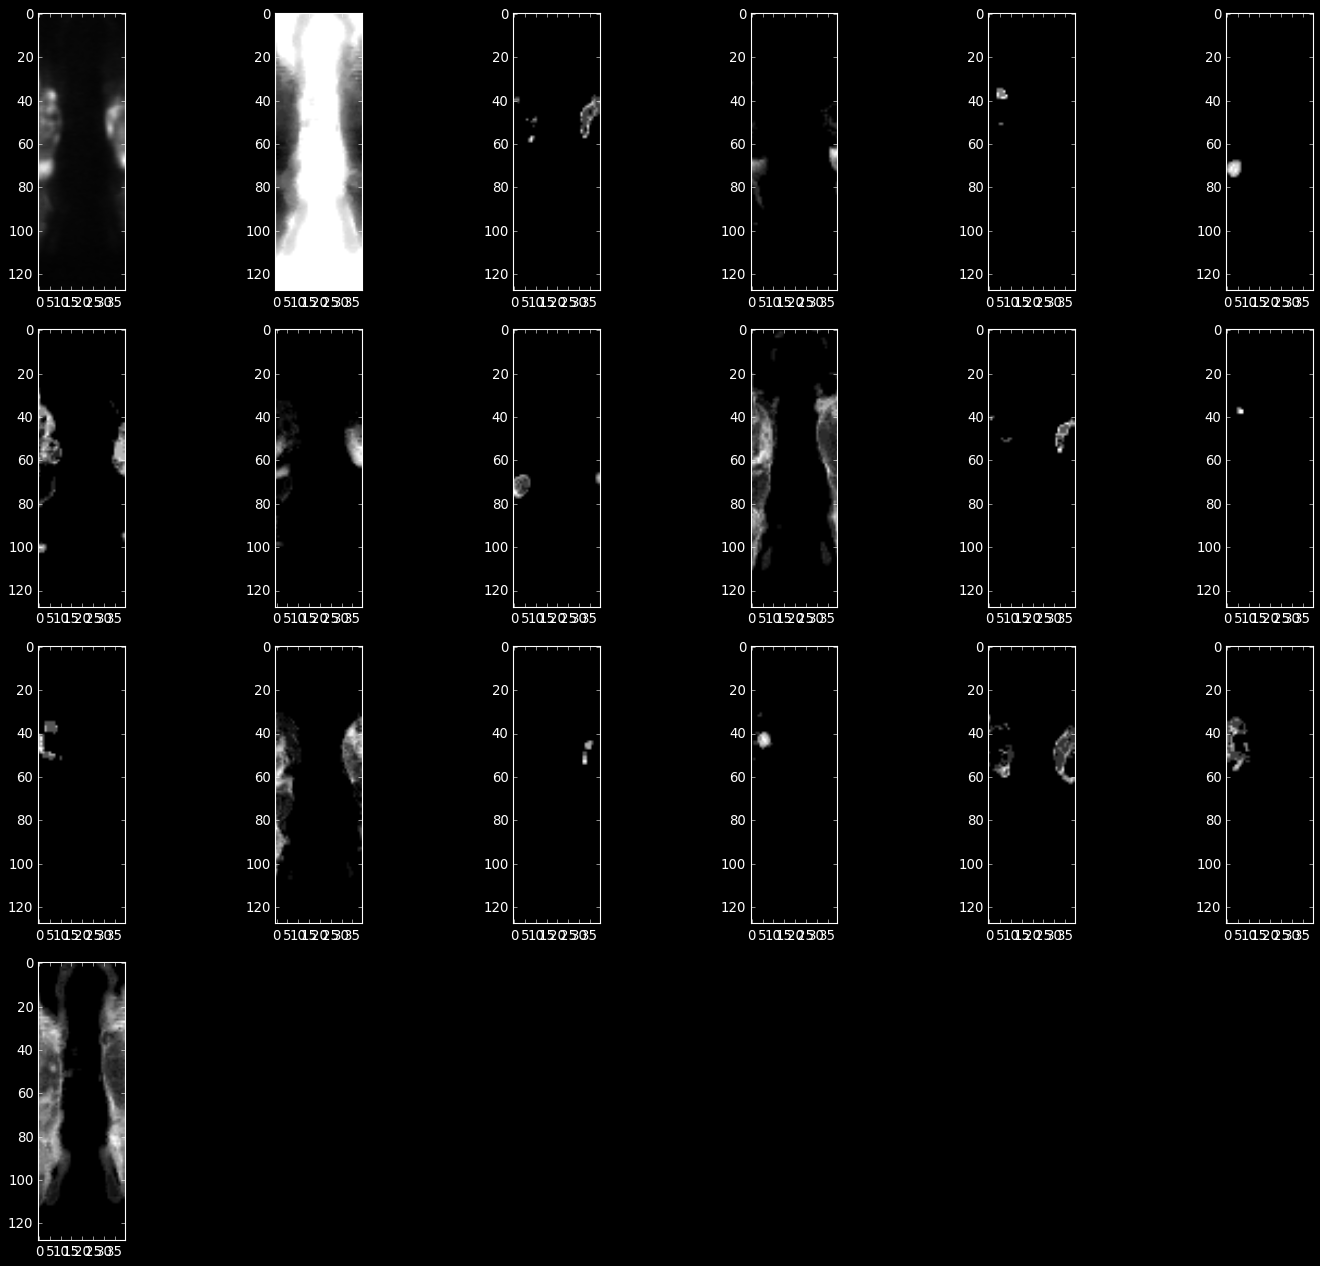

distortion:
0.0021914353307834655
Created 19 masks of image


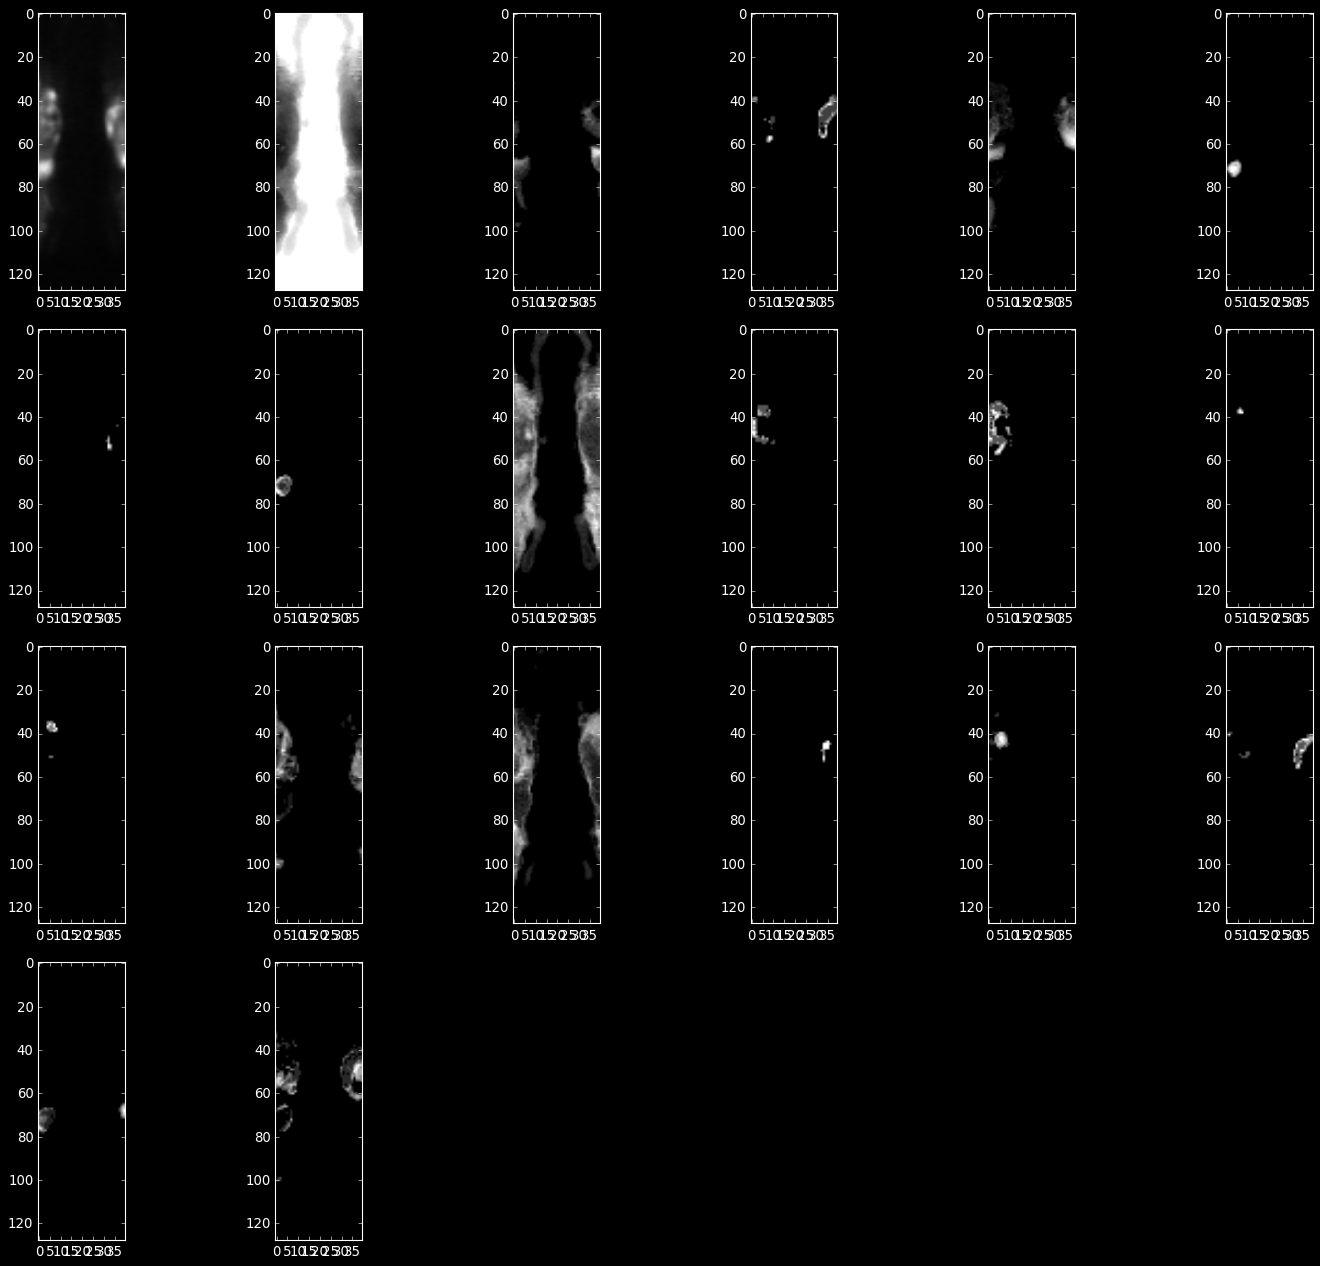

distortion:
0.0020434195339653584
Created 20 masks of image


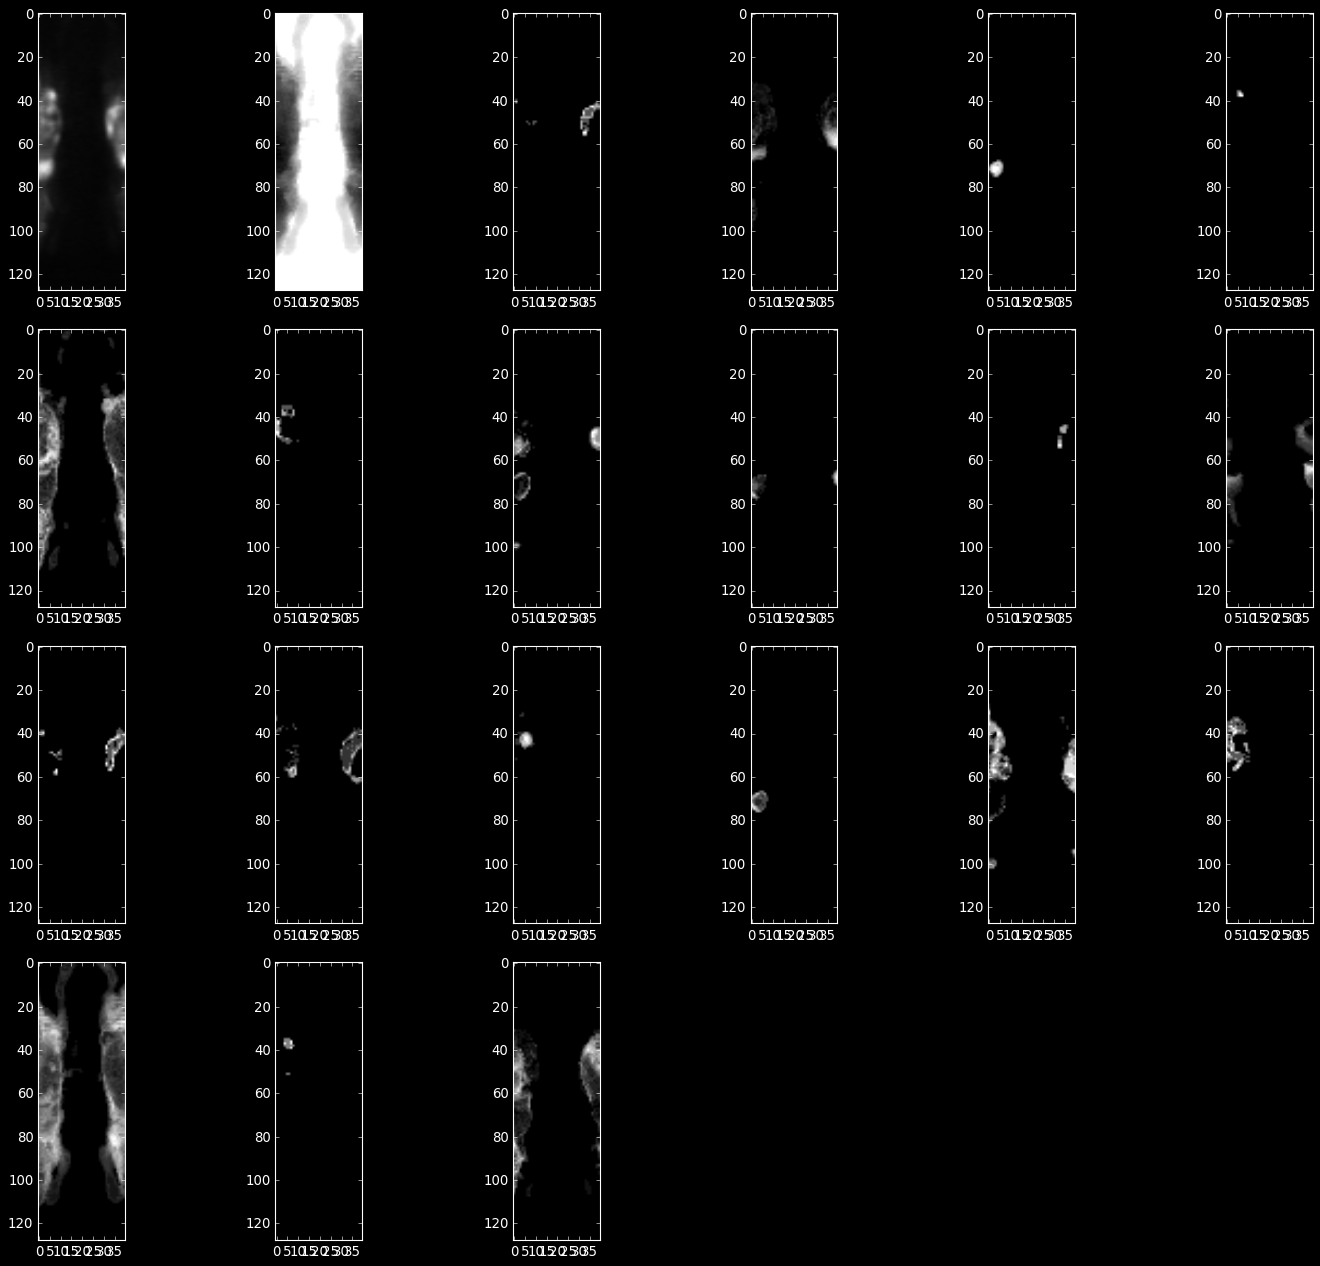

[0.006030652137273889, 0.004000907124654506, 0.0038381634104764717, 0.003647974075247052, 0.003601183150524325, 0.0030437175885415064, 0.0030090620479013286, 0.0029157432089044148, 0.0028567507802508933, 0.002794630569543739, 0.0024980991343156347, 0.0024268377523444895, 0.0023996841527520697, 0.002315584460888739, 0.002231780305457371, 0.002213157893692046, 0.0021058363214222528, 0.0021914353307834655, 0.0020434195339653584]


In [18]:
Ns = my_img.img_data.shape

# select the middle z=Ws[0],y=Ws[1],x=Ws[2] prism of each frame
Ws = (128,60,40)
roi_lims = [(int((N-W)/2),int((N+W)/2)) for N,W in zip(Ns,Ws)]

# select options for segmentation and run segmentation
print('Clustering image voxels...')

distortions = []
K = range(2,21)
for k in K:
    options = {
        'roi_lims' : roi_lims,
        'plot' : True,
        'fig_size' : (18, 16),
        'nfeatures' : 6,
        'nclusters' : k
        }
    masks, roi, distortion = kmeans_sihl(my_img,**options)              
    distortions.append(distortion)
# done with original image data
my_img.unload_image()
print(distortions)

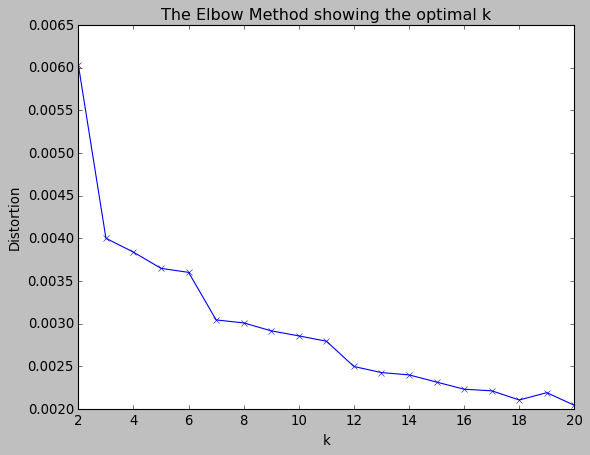

In [19]:
style.use('classic')
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

plt.show()

Something like 7 or 12 clusters might be best by this analysis.